# Tensorflow and Keras Predict of KC Sales Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import King County House Sales Dataset

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1. Exploratory Data Analysis (EDA)

In [4]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

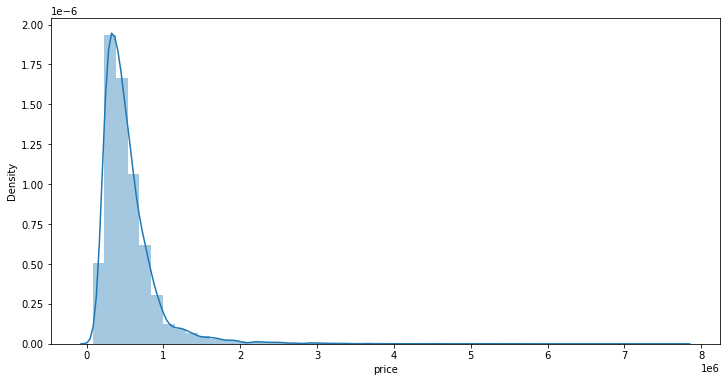

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'])

#### Most of houses prices is falling between morethan zero (actual minimum price 78k) and 1.5 millions dollars, and we could notice there is an outlier where price is really expensive above 7millions (may be drop later), the price seem to be cutoff somewhere in 2/3 mil USD.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

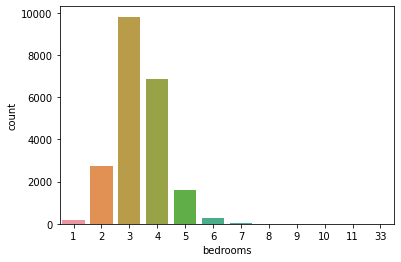

In [7]:
sns.countplot(df['bedrooms'])

#### The majority of houses bedrooms is 2-5 bedrooms, and few outliers has 33 bedrooms.

#### Find Correlation with Price Data

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

#### Apparent we could see which the most possitively correlative value with prices, square feet living has the highest most correlative among another.

<AxesSubplot:>

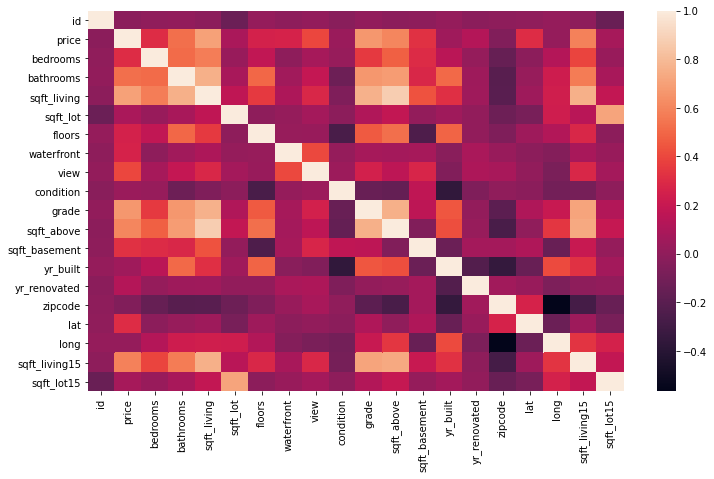

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr())

#### Take a closer

<AxesSubplot:>

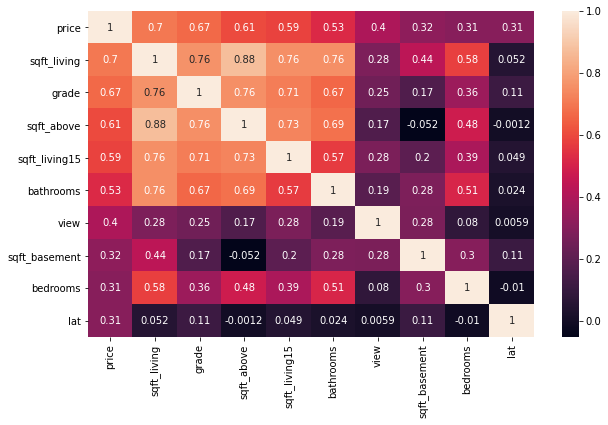

In [10]:
k = 10
plt.figure(figsize=(10,6))
cols = df.corr().nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,yticklabels=cols.values, xticklabels=cols.values)

#### Features: sqft_living , grade(amount of floors), sqft_above the ground level and sqft_15 features displayed the highest correlation wih the price of the house.
#### Moreover, there is a high correlation of sqft_living with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms. 

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

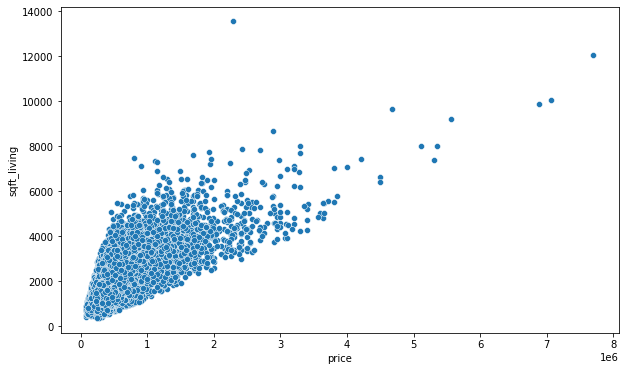

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

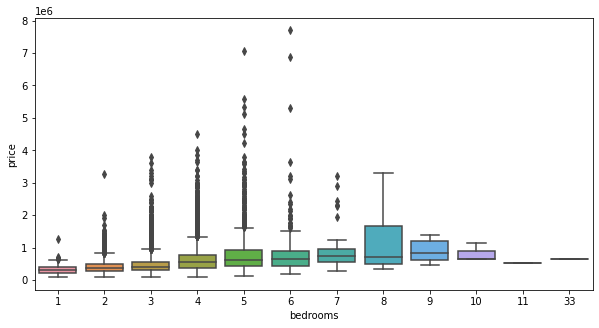

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price',data=df)

### Plot of Price and Location (Longitude & Latitude)

<AxesSubplot:xlabel='price', ylabel='long'>

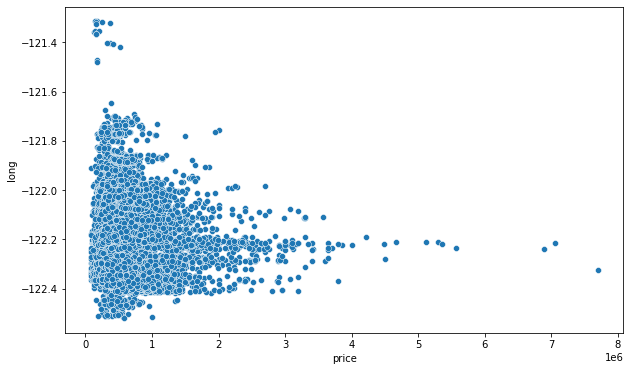

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

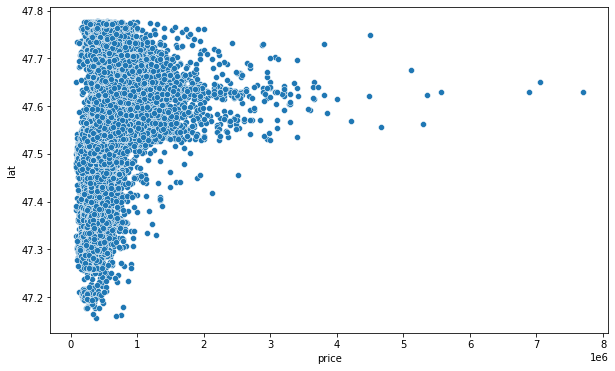

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

#### Both from geographical plot analysis, the price is tend to have smiliar price within in nearby area or range, since the latitude and longitude area is based on (x,y) in  real world we also can do plot the latitude and longitude to gain insight the scatter of sales data within the area.

<AxesSubplot:xlabel='long', ylabel='lat'>

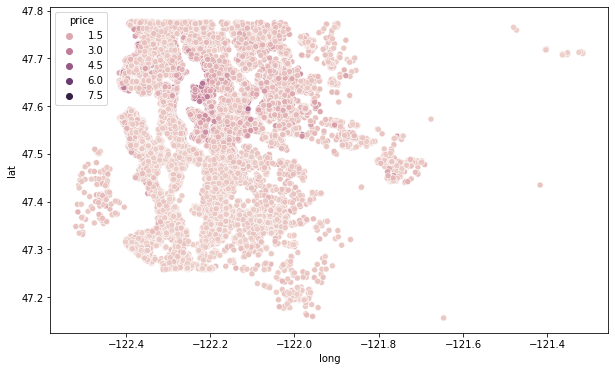

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

#### From scatter plot above is the scatter data of per-houses sales in King County area, for clearly comparison can be done side by side with king county maps, as we could se that the most expensive houses price was an outlier therefore we just can see a few only a few marker in here, to make it clear we just could grab the data without these outlier.

In [16]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


#### From the sort value of prices we could see that the top's houses price are arund 5/7 Mils but the data just few and somewhere the most average price is cut-off around 3 mils, we could notice that these outliers is less than around 1/2% of the whole data therefore we could just grab the rest 99% and see how the data distributed (without an outliers)

#### Getting 99% of data without outliers, get index the length of first 1% data then filter the rest data.

In [17]:
len(df)*0.01

215.97

In [18]:
non_outlier = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

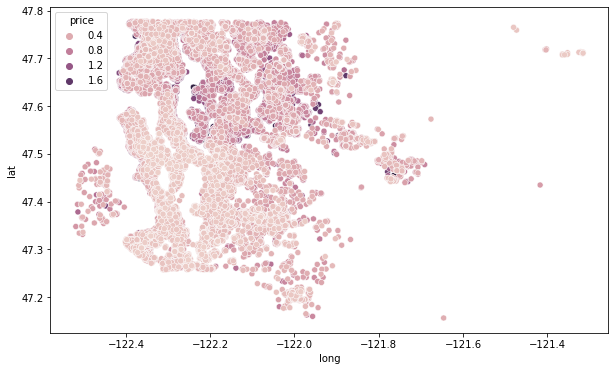

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_outlier,hue='price')

#### The plot now is more clear than previously, we could see that the scatter of prices from expensive to the lowest, and also the clear distribution.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

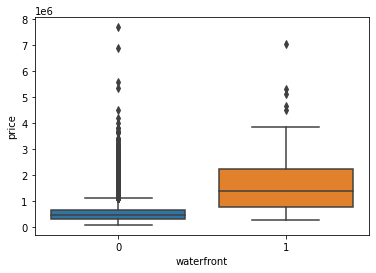

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

#### from the box plot the prices of houses with waterfront is tend to be more expensive and that make sense as we could see the distribution in scatter from geographical location.

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)
df['month'] = df['date'].apply(lambda date:date.month)

In [24]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

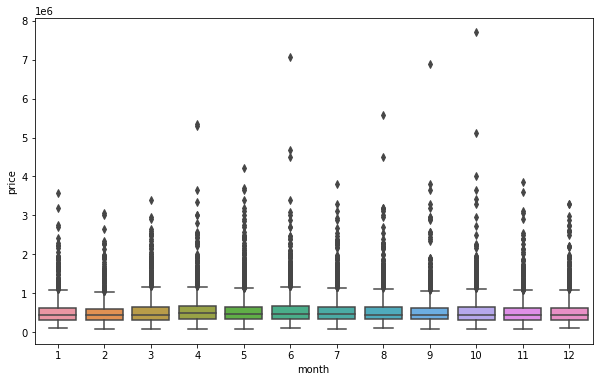

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

#### From box plot is hard to distinguish the difference of per-monthly sales, since it is shown not much significant differerences, we could get the clearer information by grabbing the mean sales per-month.

<AxesSubplot:xlabel='month'>

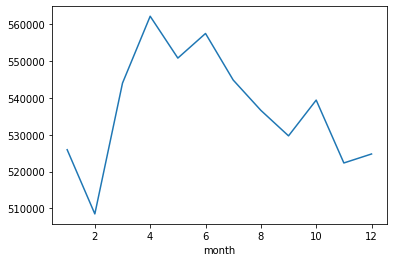

In [26]:
df.groupby('month').mean()['price'].plot()

#### The prices per-month is ranging between 5 to 5.5 Mils USD and we could see that the highest prices of houses sold was in around month- 4.

<AxesSubplot:xlabel='year'>

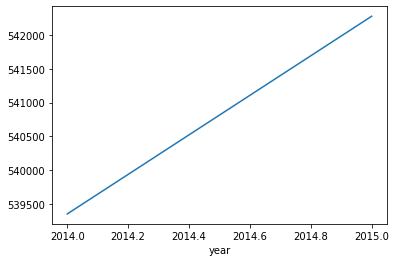

In [27]:
df.groupby('year').mean()['price'].plot()

#### We also could see that this plot is make sense that the sales price of the houses is increases over time in each year.

In [28]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

#### From zipcode we can see we have 70 variable and it is too much when using in machine learning, therefore we just drop it instead.

In [29]:
df = df.drop('zipcode',axis=1)

In [30]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### From year renovated we could know that when the houses last renovated, that most of value assigned to 0, while 0 is not a year but the houses is never renovated, we could also assign value to 1 is renovated, 0 is not renovated.

## 2. Data Preprocessing 

In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [32]:
feature_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15','month','year']
X = df[feature_col].values
y = df['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

### Transform and Fit Tips!
#### Fit : Transformer Learn something about the Data
#### Transform : It uses what it learned to do the data transformation

for example in scaler, Fit learns the mean and scale of each feature, then Transform standarize the feature using mean and scale.

#### Important :
Do Fit and Transform only on Training Data and transform only in Testing Data.

#### Why?
Example imputes learn 31,2 from 'Training Data' and fill for missing data, and fill it in 'Testing Data', therefore 31.2 is from Training Data, and if we use fit in Testing Data it will re-learn the Mean and value is not 31.2 and cause the leakage of the data.

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

## 3. Create Model and Train

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [40]:
model = Sequential()

#### And we're gonna specify the number of layer neurons based on how many feature for our actual X_train Dataset since our column for feature set is count as 16, but we could do that by using the following command.

In [41]:
X_train.shape

(15117, 16)

In [42]:
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),batch_size=128,epochs=300)

Train on 15117 samples, validate on 6480 samples
Epoch 1/300
15117/15117 [==============================] - 22s 1ms/sample - loss: 430237363335.5444 - val_loss: 418904583716.6617
Epoch 2/300
15117/15117 [==============================] - 1s 38us/sample - loss: 429253912533.5958 - val_loss: 415634639753.1654
Epoch 3/300
15117/15117 [==============================] - 1s 33us/sample - loss: 417059909044.8444 - val_loss: 388669883864.8099
Epoch 4/300
15117/15117 [==============================] - 0s 30us/sample - loss: 360461546448.7864 - val_loss: 296547037841.3827
Epoch 5/300
15117/15117 [==============================] - 0s 31us/sample - loss: 234828482881.7570 - val_loss: 155509528823.7827
Epoch 6/300
15117/15117 [==============================] - 0s 32us/sample - loss: 123023860640.2858 - val_loss: 97993622009.6790
Epoch 7/300
15117/15117 [==============================] - 1s 37us/sample - loss: 99616893425.8766 - val_loss: 94764562093.1951
Epoch 8/300
15117/15117 [===================

15117/15117 [==============================] - 1s 37us/sample - loss: 50758473177.6940 - val_loss: 47828570415.4074
Epoch 65/300
15117/15117 [==============================] - 1s 38us/sample - loss: 50628962422.6775 - val_loss: 47590722623.2099
Epoch 66/300
15117/15117 [==============================] - 1s 38us/sample - loss: 50509242041.2304 - val_loss: 47423977502.3407
Epoch 67/300
15117/15117 [==============================] - 1s 38us/sample - loss: 50360708989.5360 - val_loss: 47291846291.9111
Epoch 68/300
15117/15117 [==============================] - 1s 36us/sample - loss: 50202593983.6655 - val_loss: 47158401726.8938
Epoch 69/300
15117/15117 [==============================] - 1s 38us/sample - loss: 50078299360.8234 - val_loss: 47023155457.8963
Epoch 70/300
15117/15117 [==============================] - 1s 37us/sample - loss: 49935661228.4617 - val_loss: 46940158346.4296
Epoch 71/300
15117/15117 [==============================] - 1s 39us/sample - loss: 49778329613.4122 - val_loss

15117/15117 [==============================] - 1s 38us/sample - loss: 44296825974.2033 - val_loss: 41162388801.1062
Epoch 128/300
15117/15117 [==============================] - 1s 36us/sample - loss: 44268748544.6266 - val_loss: 41055882131.2790
Epoch 129/300
15117/15117 [==============================] - 1s 35us/sample - loss: 44241463471.1035 - val_loss: 40941835686.2420
Epoch 130/300
15117/15117 [==============================] - 1s 34us/sample - loss: 44212534996.1903 - val_loss: 40905631658.0346
Epoch 131/300
15117/15117 [==============================] - 1s 35us/sample - loss: 44151580952.5721 - val_loss: 40855379169.0272
Epoch 132/300
15117/15117 [==============================] - 1s 38us/sample - loss: 44107844831.6719 - val_loss: 40876572783.2494
Epoch 133/300
15117/15117 [==============================] - 1s 36us/sample - loss: 44066557226.5905 - val_loss: 40800860519.0321
Epoch 134/300
15117/15117 [==============================] - 1s 36us/sample - loss: 44083950593.7612 - v

15117/15117 [==============================] - 1s 37us/sample - loss: 42844570116.0304 - val_loss: 39457471482.9432
Epoch 191/300
15117/15117 [==============================] - 1s 35us/sample - loss: 42827171045.5651 - val_loss: 39405641404.3654
Epoch 192/300
15117/15117 [==============================] - 1s 36us/sample - loss: 42814318730.0507 - val_loss: 39657613438.4198
Epoch 193/300
15117/15117 [==============================] - 1s 40us/sample - loss: 42825542274.9720 - val_loss: 39450703351.1506
Epoch 194/300
15117/15117 [==============================] - 1s 39us/sample - loss: 42804582530.3962 - val_loss: 39406477580.0099
Epoch 195/300
15117/15117 [==============================] - 1s 43us/sample - loss: 42769791935.0390 - val_loss: 39378209597.3136
Epoch 196/300
15117/15117 [==============================] - 1s 38us/sample - loss: 42769027970.4809 - val_loss: 39334425213.1556
Epoch 197/300
15117/15117 [==============================] - 1s 39us/sample - loss: 42724396038.0287 - v

15117/15117 [==============================] - 1s 35us/sample - loss: 42094011002.0306 - val_loss: 38596433970.5679
Epoch 254/300
15117/15117 [==============================] - 1s 39us/sample - loss: 42077423866.2253 - val_loss: 38619686841.2049
Epoch 255/300
15117/15117 [==============================] - 1s 39us/sample - loss: 42076618183.4046 - val_loss: 38575691518.1037
Epoch 256/300
15117/15117 [==============================] - 0s 30us/sample - loss: 42101157587.7161 - val_loss: 38553620985.6790
Epoch 257/300
15117/15117 [==============================] - 0s 30us/sample - loss: 42075117199.0972 - val_loss: 38653064907.5358
Epoch 258/300
15117/15117 [==============================] - 0s 30us/sample - loss: 42054632194.3200 - val_loss: 38547787644.5235
Epoch 259/300
15117/15117 [==============================] - 0s 31us/sample - loss: 42049935138.6312 - val_loss: 38539964142.9333
Epoch 260/300
15117/15117 [==============================] - 1s 42us/sample - loss: 42030012916.0442 - v

In [47]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

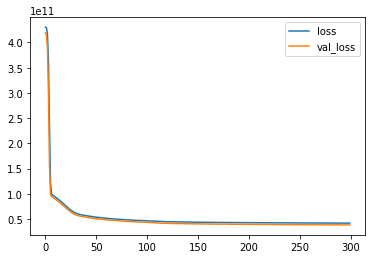

In [48]:
losses.plot()

#### From our plot between loss vs val_loss the value always decrease over epoch, and have no any spikes/increase of val_loss, this mean our data has no overfit, keep in mind that if we saw any increasing in val_loss (increasing value) that means our data has overfitting (larger loss in our validation).

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [50]:
pred = model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test,pred))

195513.33052916636

In [54]:
mean_absolute_error(y_test,pred)

128517.1246300968

In [55]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [59]:
print('Mean Absolute Error',  mean_absolute_error(y_test,pred))
print('Mean Price is',  5.402966e+05)

Mean Absolute Error 128517.1246300968
Mean Price is 540296.6


#### From the data we could conclude that the price may off 20% it is not good but not great either.

In [61]:
explained_variance_score(y_test,pred)

0.7120038135468535

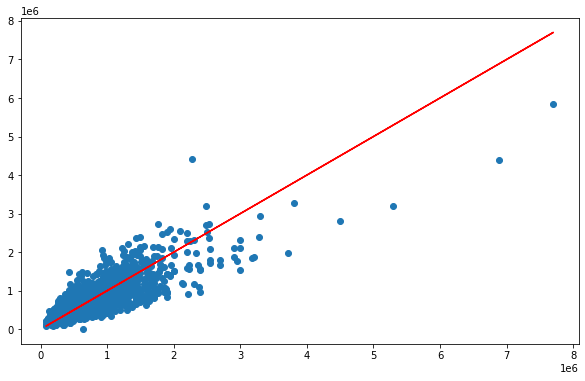

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

#### We could see that the fit between test and predict is good around 0-3 (price 0-3 Mil usd), but not good at predicting a expensive house, because we see an few outlier with high price in around 7-8Mils), but the result may good if we train without an outlier (90% topmost data)

## 3. Predicting Custom Data and Save Model

In [70]:
feature_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15','month','year']
single_house = df[feature_col].iloc[0]

In [71]:
single_house

bedrooms            3.0
bathrooms           1.0
sqft_living      1180.0
sqft_lot         5650.0
floors              1.0
view                0.0
condition           3.0
grade               7.0
sqft_above       1180.0
sqft_basement       0.0
yr_built         1955.0
yr_renovated        0.0
sqft_living15    1340.0
sqft_lot15       5650.0
month              10.0
year             2014.0
Name: 0, dtype: float64

In [73]:
single_house = scaler.transform(single_house.values.reshape(-1,16))

In [74]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.5       , 0.4       , 0.10785619, 0.        ,
        0.47826087, 0.        , 0.16193426, 0.00582059, 0.81818182,
        0.        ]])

In [77]:
print(model.predict(single_house))

[[310167.22]]


In [76]:
df['price'].iloc[0]

221900.0

### The actual price is 221900 but our prediction is 310167, that is not good because we also train the outliers with extreme value.